In [19]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps, summary_fields

API = "05pwL0aLyXiEGNsZRFhKcju39mwEqbz8"

necessary_field = ['material_id', 'formula_pretty','formula_anonymous', 'structure']
wanted_field = summary_fields['thermo']+summary_fields['dielectric']
wanted_properties = [HasProps.dielectric]

with MPRester(API) as mpr:
    docs = mpr.materials.summary.search(
        has_props = wanted_properties, fields=necessary_field+wanted_field
    )

/home/3552b737-f90f-4109-be75-4182f04db0a0/.conda/envs/materials/lib/python3.11/site-packages/mpcontribs/client/__init__.py:90: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


Retrieving SummaryDoc documents:   0%|          | 0/7290 [00:00<?, ?it/s]

In [20]:
import pandas as pd

# Converting the data raw data into dataframe
materials = []
for material in docs:
  material = dict(material)
  materials.append(material)
df = pd.DataFrame(materials)
df = df[necessary_field+wanted_field]
del df['decomposes_to']
df = df.dropna()
df.head()

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,e_total,e_ionic,e_electronic,n
0,mp-20450,YCrB4,ABC4,"[[0. 2.21929073 7.43754117] Y, [0. ...",-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,47.348925,5.890129,41.458796,6.438851
1,mp-12829,LiCaGaF6,ABCD6,"[[2.585103 1.49251265 2.46952125] Li, [ 2.58...",-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,6.967909,4.827025,2.140884,1.463176
2,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,10.490509,7.869904,2.620605,1.618828
3,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,11.718332,8.805022,2.913310,1.706842
5,mp-18860,Li2VSiO5,ABC2D5,[[-6.00941540e-05 1.49899528e-04 2.26998892e...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,16.969145,13.458970,3.510175,1.873546


In [56]:
df.describe()

,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,equilibrium_reaction_energy_per_atom,e_total,e_ionic,e_electronic,n
count,4647.000000,4647.000000,4647.000000,4647.0,4647.000000,4647.000000,4647.000000,4647.000000,4647.000000
mean,-5.179315,-5.495186,-1.653126,0.0,-0.125225,33.580406,13.686092,19.894314,2.514491
std,1.553840,1.636904,0.948962,0.0,0.348267,843.525993,154.260922,691.207126,3.684368
min,-11.047931,-11.047931,-4.427975,0.0,-4.427975,1.661731,0.000000,1.000000,1.000000
25%,-6.310245,-6.712698,-2.398983,0.0,-0.100782,8.187347,4.103627,3.070837,1.752380
50%,-5.021257,-5.325187,-1.525851,0.0,-0.041113,11.774396,6.424542,4.444352,2.108163
75%,-3.959739,-4.185729,-0.857707,0.0,-0.016220,18.910032,10.809550,6.963302,2.638807
max,-1.170909,-1.360409,0.000000,0.0,0.000000,57262.630716,10404.720206,46857.910510,216.466881


## Saving data and importing data

In [24]:
from pymatgen.io.cif import CifWriter
structure_cif = []
for index, row in df.iterrows():
    structure = row["structure"]
    cif_writer = CifWriter(structure)
    cif_string = cif_writer.__str__()
    structure_cif.append(cif_string)

df['structure']=structure_cif

filepath = "Database"
filename = "DataBase.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(filepath+"/"+filename, index=False)

```
from pymatgen.io.cif import CifParser


filepath = "<Fill your file path>"
filename = "<Fill your file name>.csv"

# Save the DataFrame to an Excel file
df = pd.read_csv(filepath+"/"+filename)

# Function to convert CIF string to PyMatGen structure
def cif_to_structure(cif_string):
    try:
        parser = CifParser.from_string(cif_string)
        structure = parser.get_structures()[0]  # Assuming there's only one structure in the CIF
        return structure
    except Exception as e:
        return None

# Apply the function to create a new 'structure' column
df['structure                  n                                  
                                                                  
                                                                   '] = df['structure'].apply(cif_to_structure)

# Print the DataFrame with the new 'structure' column
df.head()
```

In [29]:
# Str to composition descriptor
from matminer.featurizers.conversions import StrToComposition

df = StrToComposition().featurize_dataframe(df, "formula_pretty")
df.head()

StrToComposition:   0%|          | 0/4647 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,e_total,e_ionic,e_electronic,n,composition
0,mp-20450,YCrB4,ABC4,# generated using pymatgen\ndata_YCrB4\n_symme...,-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,47.348925,5.890129,41.458796,6.438851,"(Y, Cr, B)"
1,mp-12829,LiCaGaF6,ABCD6,# generated using pymatgen\ndata_LiCaGaF6\n_sy...,-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,6.967909,4.827025,2.140884,1.463176,"(Li, Ca, Ga, F)"
2,mp-23004,CsMgCl3,ABC3,# generated using pymatgen\ndata_CsMgCl3\n_sym...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,10.490509,7.869904,2.620605,1.618828,"(Cs, Mg, Cl)"
3,mp-5784,Na2GeO3,AB2C3,# generated using pymatgen\ndata_Na2GeO3\n_sym...,-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,11.718332,8.805022,2.913310,1.706842,"(Na, Ge, O)"
5,mp-18860,Li2VSiO5,ABC2D5,# generated using pymatgen\ndata_Li2VSiO5\n_sy...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,16.969145,13.458970,3.510175,1.873546,"(Li, V, Si, O)"


# Formula Fraction

In [30]:
# Element Fraction Descriptor
from matminer.featurizers.composition import ElementFraction

df_fraction = df.copy()
df_fraction = ElementFraction().featurize_dataframe(df_fraction, col_id="composition") # input the "composition" column to the featurizer

ElementFraction:   0%|          | 0/4647 [00:00<?, ?it/s]

In [61]:
df_fraction.head()

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,mp-20450,YCrB4,ABC4,"[[0. 2.21929073 7.43754117] Y, [0. ...",-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,...,0,0,0,0,0,0,0,0,0,0
1,mp-12829,LiCaGaF6,ABCD6,"[[2.585103 1.49251265 2.46952125] Li, [ 2.58...",-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,...,0,0,0,0,0,0,0,0,0,0
2,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,...,0,0,0,0,0,0,0,0,0,0
3,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,...,0,0,0,0,0,0,0,0,0,0
5,mp-18860,Li2VSiO5,ABC2D5,[[-6.00941540e-05 1.49899528e-04 2.26998892e...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,...,0,0,0,0,0,0,0,0,0,0


# Element Property

In [62]:
from matminer.featurizers.composition import ElementProperty

df_el_prop = df.copy()

ep_feat = ElementProperty.from_preset(preset_name="magpie")
df_el_prop = ep_feat.featurize_dataframe(df_el_prop, col_id="composition")  # input the "composition" column to the featurizer
df_el_prop.head()

ElementProperty:   0%|          | 0/4647 [00:00<?, ?it/s]

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,equilibrium_reaction_energy_per_atom,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-20450,YCrB4,ABC4,"[[0. 2.21929073 7.43754117] Y, [0. ...",-7.792765,-7.792765,-0.653251,0.0,True,-0.090978,...,0.0,0.0,0.0,0.0,166.0,229.0,63.0,181.166667,20.222222,166.0
1,mp-12829,LiCaGaF6,ABCD6,"[[2.585103 1.49251265 2.46952125] Li, [ 2.58...",-5.201571,-5.509571,-3.463849,0.0,True,-0.033327,...,0.0,0.0,0.0,0.0,15.0,229.0,214.0,67.555556,70.864198,15.0
2,mp-23004,CsMgCl3,ABC3,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,-3.562126,-3.930526,-2.322267,0.0,True,-0.060977,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,123.000000,70.800000,64.0
3,mp-5784,Na2GeO3,AB2C3,"[[2.41617135 2.72894511 0.53332247] Na, [2.416...",-5.481207,-5.824707,-2.140016,0.0,True,-0.074727,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,119.833333,107.833333,12.0
5,mp-18860,Li2VSiO5,ABC2D5,[[-6.00941540e-05 1.49899528e-04 2.26998892e...,-6.980618,-7.551173,-2.766672,0.0,True,-0.001164,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,108.222222,106.913580,12.0


# Preparing data for machine learning

In [63]:
import numpy as np

y = df_fraction['formation_energy_per_atom']
excluded = np.array(df.columns)

X_el = df_el_prop.drop(excluded, axis=1)
X_frac = df_fraction.drop(excluded, axis=1)

_, feat_col_el = X_el.shape
_, feat_col_frac = X_frac.shape

In [91]:
el = np.array(X_el.columns.values)
frac = np.array(X_frac.columns.values)

np.save("TrainingData/el_col.npy", el)
np.save("TrainingData/frac_col.npy", frac)

In [64]:
print("There are {} possible descriptors:\n\n{}".format(X_el.shape[1], X_el.columns.values))

There are 132 possible descriptors:

['MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column'
 'MagpieData minimum Row' 'MagpieData maximum 

In [67]:
print("There are {} possible descriptors:\n\n{}".format(X_frac.shape[1], X_frac.columns.values))

There are 103 possible descriptors:

['H' 'He' 'Li' 'Be' 'B' 'C' 'N' 'O' 'F' 'Ne' 'Na' 'Mg' 'Al' 'Si' 'P' 'S'
 'Cl' 'Ar' 'K' 'Ca' 'Sc' 'Ti' 'V' 'Cr' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Ga'
 'Ge' 'As' 'Se' 'Br' 'Kr' 'Rb' 'Sr' 'Y' 'Zr' 'Nb' 'Mo' 'Tc' 'Ru' 'Rh' 'Pd'
 'Ag' 'Cd' 'In' 'Sn' 'Sb' 'Te' 'I' 'Xe' 'Cs' 'Ba' 'La' 'Ce' 'Pr' 'Nd' 'Pm'
 'Sm' 'Eu' 'Gd' 'Tb' 'Dy' 'Ho' 'Er' 'Tm' 'Yb' 'Lu' 'Hf' 'Ta' 'W' 'Re' 'Os'
 'Ir' 'Pt' 'Au' 'Hg' 'Tl' 'Pb' 'Bi' 'Po' 'At' 'Rn' 'Fr' 'Ra' 'Ac' 'Th'
 'Pa' 'U' 'Np' 'Pu' 'Am' 'Cm' 'Bk' 'Cf' 'Es' 'Fm' 'Md' 'No' 'Lr']


# Saving training data

In [75]:
# Save to disk for later training
np.save("TrainingData/X_el.npy", X_el)
np.save("TrainingData/X_frac.npy", X_frac)
np.save("TrainingData/y.npy", y)

# Xgboost

## Element Property

In [51]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
X_el = np.load("TrainingData/X_el.npy")
y = np.load("TrainingData/y.npy")

el = np.load("TrainingData/el_col.npy", allow_pickle=True) # allow_pickel = True when you input string data

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_el, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Saving and uploading the model

In [53]:
import xgboost as xgb
import pickle

# Save the model to a file using pickle
with open("Models/el_xgboost.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


### Graph

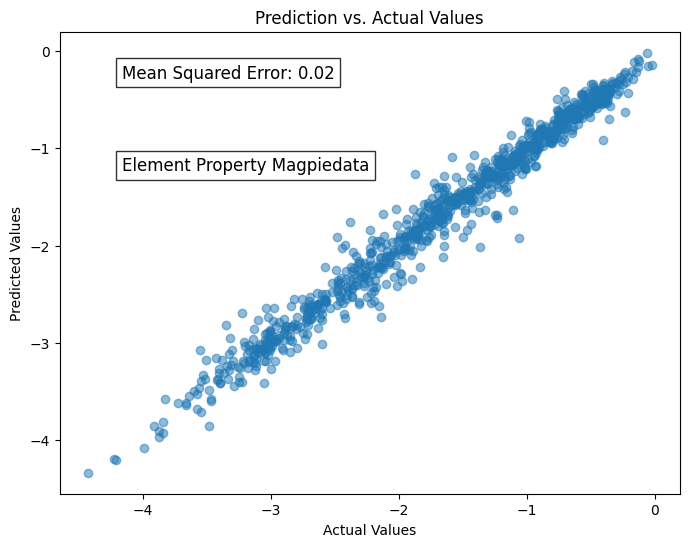

In [55]:
# Load the model from the saved file
with open("Models/el_xgboost.pkl", "rb") as model_file:
    model = pickle.load(model_file)
    
# Now you can use the loaded model for predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
mse_text = f"Mean Squared Error: {mse:.2f}"

# Create a graph for prediction vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual Values")

# Add the MSE value as text in the graph
plt.text(0.1, 0.9, mse_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.1, 0.7, "Element Property Magpiedata", transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("Images/el_xgboost.png")  # Save the plot to a file
plt.show()

### Feature importance

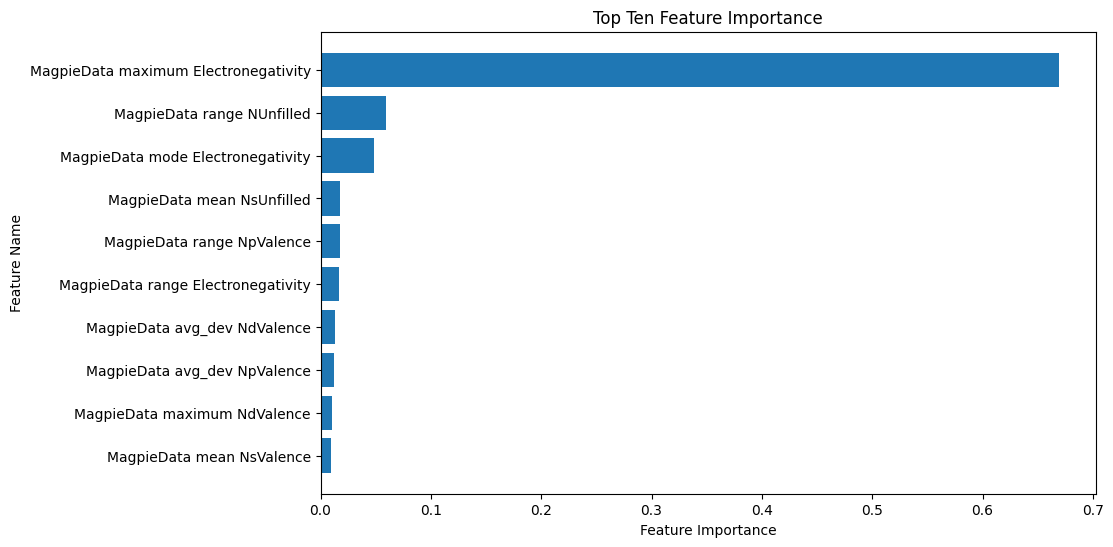

In [59]:
# Get feature importances
importances = model.feature_importances_

# Get feature names (assuming your feature names are stored in a list)
feature_names = el

# Sort the feature importances and select the top ten
sorted_idx = np.argsort(importances)[::-1]
top_ten_indices = sorted_idx[:10]
top_ten_importances = importances[top_ten_indices]
top_ten_feature_names = [feature_names[i] for i in top_ten_indices]

# Create a bar graph for feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_ten_feature_names, top_ten_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top Ten Feature Importance")
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.savefig("Images/el_Xgboost_feat.png")  # Save the plot to a file
plt.show()

## Element Fraction

In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
X_frac = np.load("TrainingData/X_frac.npy")
y = np.load("TrainingData/y.npy")

frac = np.load("TrainingData/frac_col.npy", allow_pickle=True) # allow_pickel = True when you input string data

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_frac, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Saving and uploading the model

In [15]:
import xgboost as xgb
import pickle

# Save the model to a file using pickle
with open("Models/frac_xgboost.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


### Graph

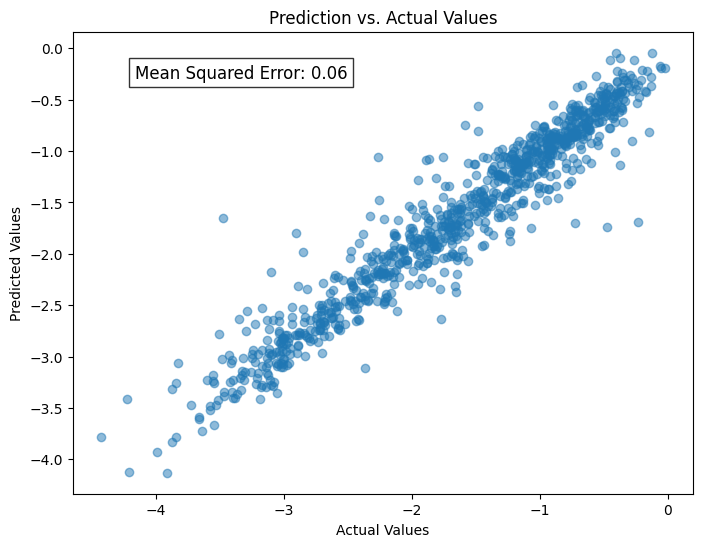

In [17]:
# Load the model from the saved file
with open("Models/frac_xgboost.pkl", "rb") as model_file:
    model = pickle.load(model_file)
    
# Now you can use the loaded model for predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
mse_text = f"Mean Squared Error: {mse:.2f}"

# Create a graph for prediction vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual Values")

# Add the MSE value as text in the graph
plt.text(0.1, 0.9, mse_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("Images/frac_xgboost.png")  # Save the plot to a file
plt.show()

### Feature importance

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Get feature names (assuming your feature names are stored in a list)
feature_names = frac

# Sort the feature importances and select the top ten
sorted_idx = np.argsort(importances)[::-1]
top_ten_indices = sorted_idx[:10]
top_ten_importances = importances[top_ten_indices]
top_ten_feature_names = [feature_names[i] for i in top_ten_indices]

# Create a bar graph for feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_ten_feature_names, top_ten_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top Ten Feature Importance")
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.savefig("Images/frac_Xgboost_feat.png")  # Save the plot to a file
plt.show()

## DFT Based

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

# Load the data
X_dft_atom = np.load("TrainingData/X_dft_atom.npy")
y = np.load("TrainingData/y_dft.npy")
_, feat_col_dft = X_dft_atom.shape

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_dft_atom, y, test_size=0.2, random_state=42)

In [7]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
import xgboost as xgb
import pickle

# Save the model to a file using pickle
with open("Models/dft_xgboost.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


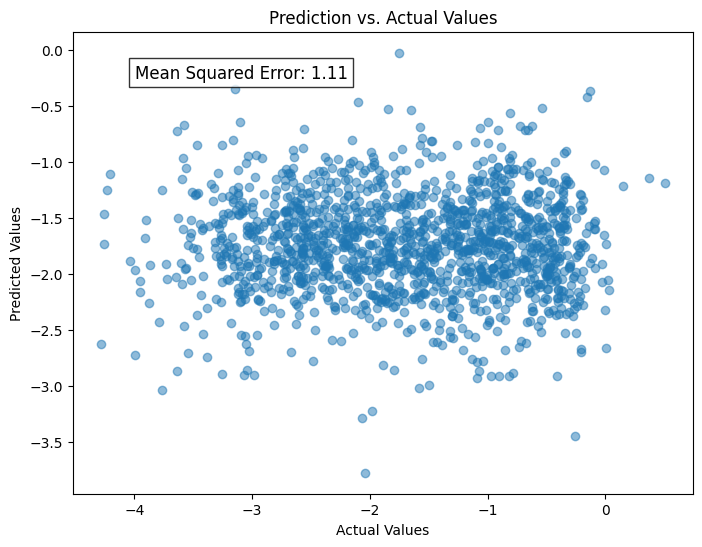

In [11]:
# Load the model from the saved file
with open("Models/dft_xgboost.pkl", "rb") as model_file:
    model = pickle.load(model_file)
    
# Now you can use the loaded model for predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
mse_text = f"Mean Squared Error: {mse:.2f}"

# Create a graph for prediction vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual Values")

# Add the MSE value as text in the graph
plt.text(0.1, 0.9, mse_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("Images/dft_xgboost.png")  # Save the plot to a file
plt.show()

# DFT Based Descriptors

In [69]:
df_dft = pd.read_excel("Database/DFTBased_Descriptors.xlsx")
df_dft = df_dft.dropna()
df_dft.head()

,formula_pretty,formula_anonymous,chemsys,material_id,structure,formation_energy_per_atom,is_metal,e_total,e_ionic,e_electronic,...,e_total_free,ef,e_band/num_atoms,e_coulomb/num_atoms,e_entropy/num_atoms,e_external/num_atoms,e_kinetic/num_atoms,e_kinetic0/num_atoms,e_xc/num_atoms,e_total_free/num_atoms
0,YCrB4,ABC4,B-Cr-Y,mp-20450,Full Formula (Y4 Cr4 B16)\nReduced Formula: YC...,-0.653251,False,47.348925,5.890129,41.458796,...,-5.858164,11.163444,0.024319,-0.188020,-2.767267e-05,0,0.221036,0.196718,-0.279148,-0.244090
1,LiCaGaF6,ABCD6,Ca-F-Ga-Li,mp-12829,Full Formula (Li2 Ca2 Ga2 F12)\nReduced Formul...,-3.463849,False,6.967909,4.827025,2.140884,...,-2.640814,3.665931,-1.747124,-0.837262,-1.270295e-12,0,0.958238,2.705362,-0.282488,-0.146712
2,Na2GeO3,AB2C3,Ge-Na-O,mp-5784,Full Formula (Na4 Ge2 O6)\nReduced Formula: Na...,-2.140016,False,11.718332,8.805022,2.913310,...,-1.935350,3.721439,-1.917246,-0.664702,-5.033265e-08,0,0.767800,2.685047,-0.275572,-0.161279
3,CsMgCl3,ABC3,Cl-Cs-Mg,mp-23004,Full Formula (Cs2 Mg2 Cl6)\nReduced Formula: C...,-2.322267,False,10.490509,7.869904,2.620605,...,-0.992013,4.640916,-3.683055,-0.640347,-2.584534e-12,0,0.733330,4.416384,-0.197104,-0.099201
4,Li2VSiO5,ABC2D5,Li-O-Si-V,mp-18860,Full Formula (Li8 V4 Si4 O20)\nReduced Formula...,-2.766672,False,16.969145,13.458970,3.510175,...,-3.878814,6.460653,-1.758132,-0.449097,-5.588154e-04,0,0.499584,2.257716,-0.272984,-0.215490


In [178]:
df_dft.describe()

,formation_energy_per_atom,e_total,e_ionic,e_electronic,n,e_band,e_coulomb,e_entropy,e_external,e_kinetic,...,e_total_free,ef,e_band/num_atoms,e_coulomb/num_atoms,e_entropy/num_atoms,e_external/num_atoms,e_kinetic/num_atoms,e_kinetic0/num_atoms,e_xc/num_atoms,e_total_free/num_atoms
count,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7.282000e+03,7282.0,7282.000000,...,7282.000000,7282.000000,7282.000000,7282.000000,7.282000e+03,7282.0,7282.000000,7282.000000,7282.000000,7282.000000
mean,-1.730789,50.542578,32.203853,18.338725,2.433682,-30.821360,-8.276772,-5.041420e-03,0.0,9.636030,...,-2.402059,5.527609,-2.049468,-0.551831,-4.720364e-04,0.0,0.649647,2.699115,-0.242890,-0.136438
std,0.981571,1655.786690,1488.643342,625.633373,3.525128,32.594943,7.187833,9.627023e-03,0.0,8.491422,...,2.395910,2.646936,1.468104,0.322300,9.800521e-04,0.0,0.391938,1.491018,0.073299,0.067446
min,-4.491319,1.247628,0.000000,-64.837332,0.000000,-933.661333,-113.833179,-1.015682e-01,0.0,-11.606242,...,-31.845204,-6.917607,-17.335241,-2.300147,-1.203983e-02,0.0,-1.589091,-1.177472,-0.597707,-0.381674
25%,-2.489514,7.890570,3.998817,2.936743,1.713693,-41.070251,-10.830594,-7.127465e-03,0.0,4.136064,...,-3.114412,3.863295,-2.792223,-0.714543,-5.773672e-04,0.0,0.400101,1.667064,-0.293588,-0.181484
50%,-1.674507,11.705270,6.475891,4.284852,2.069988,-23.203788,-6.618554,-5.414935e-05,0.0,7.599285,...,-1.849634,5.332630,-1.840201,-0.525961,-4.155828e-06,0.0,0.612140,2.517605,-0.244903,-0.135335
75%,-0.924987,18.890131,11.313446,6.584506,2.566029,-11.701235,-3.596435,-9.740199e-08,0.0,12.599724,...,-0.927739,7.137516,-1.038747,-0.353387,-6.680565e-09,0.0,0.853129,3.490273,-0.186049,-0.098140
max,5.212425,126575.316823,126567.273642,46857.910510,216.466881,33.223763,8.352722,-2.734205e-44,0.0,132.673591,...,1.474020,18.102709,2.018462,1.389564,-1.367103e-44,0.0,2.805217,16.358351,0.032007,0.265215


In [148]:
df_dft.dtypes

formula_pretty                object
formula_anonymous             object
chemsys                       object
material_id                   object
structure                     object
formation_energy_per_atom    float64
is_metal                        bool
e_total                      float64
e_ionic                      float64
e_electronic                 float64
n                            float64
fields_not_requested          object
structure_cif                 object
e_band                       float64
e_coulomb                    float64
e_entropy                    float64
e_external                     int64
e_kinetic                    float64
e_kinetic0                   float64
e_xc                         float64
e_total_free                 float64
ef                           float64
e_band/num_atoms             float64
e_coulomb/num_atoms          float64
e_entropy/num_atoms          float64
e_external/num_atoms           int64
e_kinetic/num_atoms          float64
e

In [150]:
for key, val in enumerate(df_dft.columns):
    print(f"{key=}, {val=}")

key=0, val='formula_pretty'
key=1, val='formula_anonymous'
key=2, val='chemsys'
key=3, val='material_id'
key=4, val='structure'
key=5, val='formation_energy_per_atom'
key=6, val='is_metal'
key=7, val='e_total'
key=8, val='e_ionic'
key=9, val='e_electronic'
key=10, val='n'
key=11, val='fields_not_requested'
key=12, val='structure_cif'
key=13, val='e_band'
key=14, val='e_coulomb'
key=15, val='e_entropy'
key=16, val='e_external'
key=17, val='e_kinetic'
key=18, val='e_kinetic0'
key=19, val='e_xc'
key=20, val='e_total_free'
key=21, val='ef'
key=22, val='e_band/num_atoms'
key=23, val='e_coulomb/num_atoms'
key=24, val='e_entropy/num_atoms'
key=25, val='e_external/num_atoms'
key=26, val='e_kinetic/num_atoms'
key=27, val='e_kinetic0/num_atoms'
key=28, val='e_xc/num_atoms'
key=29, val='e_total_free/num_atoms'


In [71]:
y = df_dft['formation_energy_per_atom']
excluded = np.array(df_dft.columns[:21])

X_dft_atom = df_dft.drop(excluded, axis=1)

_, feat_col_dft = X_dft_atom.shape

In [209]:
# Save to disk for later training
np.save("TrainingData/X_dft_atom.npy", X_dft_atom)
np.save("TrainingData/y_dft.npy", y)

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

# Load the data
X_dft_atom = np.load("TrainingData/X_dft_atom.npy")
y = np.load("TrainingData/y_dft.npy")
_, feat_col_dft = X_dft_atom.shape

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_dft_atom, y, test_size=0.2, random_state=42)

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

import numpy as np


# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(feat_col_dft,))

model = tf.keras.Sequential([
        input_layer,
        tf.keras.layers.Dense(feat_col_dft),
        tf.keras.layers.Dense(1, activation='linear')
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=50,
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
    batch_size=32
)



2023-11-01 19:07:28.650363: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 19:07:28.695500: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 19:07:28.695526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 19:07:28.695561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 19:07:28.707323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 19:07:28.707814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/50
146/146 [==============================] - 1s 2ms/step - loss: 1.7220 - val_loss: 1.1174
Epoch 2/50
146/146 [==============================] - 0s 1ms/step - loss: 0.9976 - val_loss: 0.9774
Epoch 3/50
146/146 [==============================] - 0s 1ms/step - loss: 0.9310 - val_loss: 0.9309
Epoch 4/50
146/146 [==============================] - 0s 1ms/step - loss: 0.8927 - val_loss: 0.9017
Epoch 5/50
146/146 [==============================] - 0s 1ms/step - loss: 0.8686 - val_loss: 0.8814
Epoch 6/50
146/146 [==============================] - 0s 2ms/step - loss: 0.8545 - val_loss: 0.8678
Epoch 7/50
146/146 [==============================] - 0s 1ms/step - loss: 0.8472 - val_loss: 0.8631
Epoch 8/50
146/146 [==============================] - 0s 2ms/step - loss: 0.8418 - val_loss: 0.8561
Epoch 9/50
146/146 [==============================] - 0s 2ms/step - loss: 0.8363 - val_loss: 0.8516
Epoch 10/50
146/146 [==============================] - 0s 2ms/step - loss: 0.8340 - val_loss: 0.8540

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Define the input layer with the appropriate input shape
input_layer = tf.keras.layers.Input(shape=(feat_col_dft,))

model = tf.keras.Sequential([
        input_layer,
        tf.keras.layers.Dense(128, activation='linear'),
        tf.keras.layers.Dense(64, activation='linear'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

# # Add L2 regularization to the model
# model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

model.compile(loss='mean_squared_error',  # Switched to mean squared error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=100,  # Increased the number of epochs
    verbose=1,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],  # Increased patience
    batch_size=32
)


Epoch 1/100
146/146 [==============================] - 1s 3ms/step - loss: 1.1493 - val_loss: 1.0461
Epoch 2/100
146/146 [==============================] - 0s 2ms/step - loss: 1.0540 - val_loss: 1.0291
Epoch 3/100
146/146 [==============================] - 0s 2ms/step - loss: 1.0250 - val_loss: 1.0136
Epoch 4/100
146/146 [==============================] - 0s 2ms/step - loss: 1.0025 - val_loss: 1.1167
Epoch 5/100
146/146 [==============================] - 0s 2ms/step - loss: 1.0321 - val_loss: 1.0856
Epoch 6/100
146/146 [==============================] - 0s 2ms/step - loss: 1.0045 - val_loss: 1.0542
Epoch 7/100
146/146 [==============================] - 0s 2ms/step - loss: 1.0161 - val_loss: 1.0155
Epoch 8/100
146/146 [==============================] - 0s 2ms/step - loss: 0.9917 - val_loss: 1.0324
Epoch 9/100
146/146 [==============================] - 0s 2ms/step - loss: 0.9975 - val_loss: 1.0369
Epoch 10/100
146/146 [==============================] - 0s 2ms/step - loss: 0.9908 - val_lo

## One Layer

In [ ]:
neuron_mult = [1,2,3,4,5,6,7,8,9]

results = {}

def build_and_train_model(num_mult):

    input_layer = tf.keras.layers.Input(shape=(feat_col_dft,))

    model = tf.keras.Sequential([
            input_layer,
            tf.keras.layers.Dense(int(feat_col_dft*num_mult)),
            tf.keras.layers.Dense(1, activation='linear')
        ])

    model.compile(loss='mean_absolute_error',
                  optimizer="adam")

    history = model.fit(
        np.array(X_train),
        np.array(y_train),
        epochs=10,
        verbose = 0,
        validation_split=0.2,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
        batch_size=32
    )

    loss = history.history['val_loss'][-1]

    return loss

for num_mult in neuron_mult: # adding iteration
    print(f"Number of neuron: {feat_col_dft*num_mult}")
    loss = build_and_train_model(num_mult)
    print(f"Loss value: {loss}")
    print("-"*50)
    results[num_mult] = loss

Number of neuron: 9
Loss value: 0.844761073589325
--------------------------------------------------
Number of neuron: 18
Loss value: 0.8417701125144958
--------------------------------------------------
Number of neuron: 27
Loss value: 0.8443213701248169
--------------------------------------------------
Number of neuron: 36
Loss value: 0.8456546068191528
--------------------------------------------------
Number of neuron: 45
Loss value: 0.8429564237594604
--------------------------------------------------
Number of neuron: 54
Loss value: 0.8520053029060364
--------------------------------------------------
Number of neuron: 63
Loss value: 0.8449925780296326
--------------------------------------------------
Number of neuron: 72
Loss value: 0.8437011241912842
--------------------------------------------------
Number of neuron: 81


In [229]:
# Save the results to a JSON file
# filepath = "<file path>"
import json

filename = "OneLayer.json"

with open('DeepLearning'+'/'+filename, 'w') as json_file:
    json.dump(results, json_file)

In [231]:
# Load the results from the JSON file
with open('DeepLearning'+'/'+filename, 'r') as json_file:
    results = json.load(json_file)

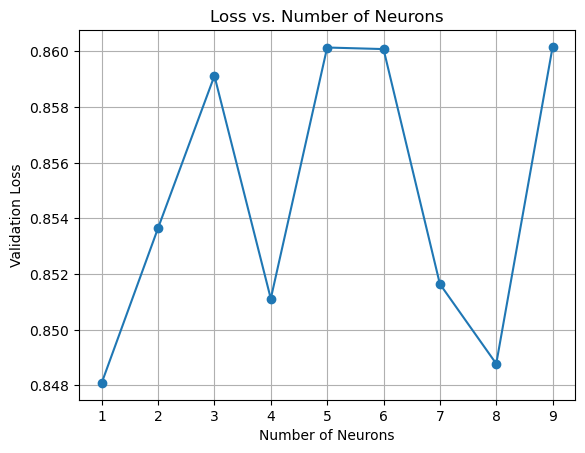

In [233]:
import matplotlib.pyplot as plt

# Extract the values for the x-axis and y-axis from the results dictionary
x_values = [num for num in neuron_mult]
y_values = [results[str(num)] for num in neuron_mult]

# Plot the loss vs. number of neurons
plt.plot(x_values, y_values, marker='o')
plt.xlabel("Number of Neurons")
plt.ylabel("Validation Loss")
plt.title("Loss vs. Number of Neurons")
plt.grid(True)

# Save or display the plot
plt.savefig('DeepLearning'+'/'+"OneLayer.png")  # Save the plot to a file
plt.show()  # Display the plot

## Two layer

In [ ]:
neuron_mult = [1,2,3,4,5,6,7,8,9]

results = {}

def build_and_train_model(num_mult):

    input_layer = tf.keras.layers.Input(shape=(feat_col_dft,))

    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_dft_atom))

    model = tf.keras.Sequential([
            input_layer,
            normalizer,
            tf.keras.layers.Dense(int(feat_col_dft, activation='relu'),
            tf.keras.layers.Dense(1)
        ])

    model.compile(loss='mean_absolute_error',
                  optimizer="adam")

    history = model.fit(
        np.array(X_train),
        np.array(y_train),
        epochs=10,
        verbose = 0,
        validation_split=0.2,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
        batch_size=32
    )

    loss = history.history['val_loss'][-1]

    return loss

for num_mult in neuron_mult: # adding iteration
    print(f"Number of neuron: {feat_col_dft*num_mult}")
    loss = build_and_train_model(num_mult)
    print(f"Loss value: {loss}")
    print("-"*50)
    results[num_mult] = loss